In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以南投縣第二選區立委許淑華為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [22]:
hsu = fb[fb.page_name == "許淑華"]
# 把時間格式轉換
hsu['new_date'] = pd.to_datetime(hsu['created_time_taipei']).dt.date
hsu['post_hour'] = pd.to_datetime(hsu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
hsu['month_year'] = pd.to_datetime(hsu['new_date']).dt.to_period('M')
hsu.head(1)

<ipython-input-22-f8f3d7101c62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date'] = pd.to_datetime(hsu['created_time_taipei']).dt.date
<ipython-input-22-f8f3d7101c62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['post_hour'] = pd.to_datetime(hsu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-22-f8f3d7101c62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2523,130771133668155_2032861576792425,130771133668155,許淑華,政治人物,2020年選舉即將到來，趁著休會先把文宣照拍起來。\n跟大家說早安~~,NaN,photo,https://www.facebook.com/130771133668155/posts...,2019-01-14T22:43:26+0000,2019-01-15T06:43:26,...,0,0,0,0,0,758,509,2019-01-15,6,2019-01


In [23]:
#發文時間分佈
post_time = hsu[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,5,14
1,6,110
2,7,89
3,8,19
4,9,10
5,10,5
6,11,9
7,12,10
8,13,5
9,14,9


In [24]:
hsu[hsu.created_time_taipei == max(hsu.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2819,130771133668155_2682321708513072,130771133668155,許淑華,政治人物,【最強組合 守護南投】\n 總統2號 韓國瑜\n 立委1號 許淑華\n 政...,NaN,photo,https://www.facebook.com/130771133668155/posts...,2020-01-10T08:54:55+0000,2020-01-10T16:54:55,...,0,0,0,0,0,854,173,2020-01-10,16,2020-01


In [25]:
hsu[hsu.created_time_taipei == min(hsu.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2533,130771133668155_2012363512175565,130771133668155,許淑華,政治人物,新的一年祝大家心想事成升官發財~~,NaN,photo,https://www.facebook.com/130771133668155/posts...,2018-12-31T21:20:49+0000,2019-01-01T05:20:49,...,0,0,0,0,0,1036,489,2019-01-01,5,2019-01


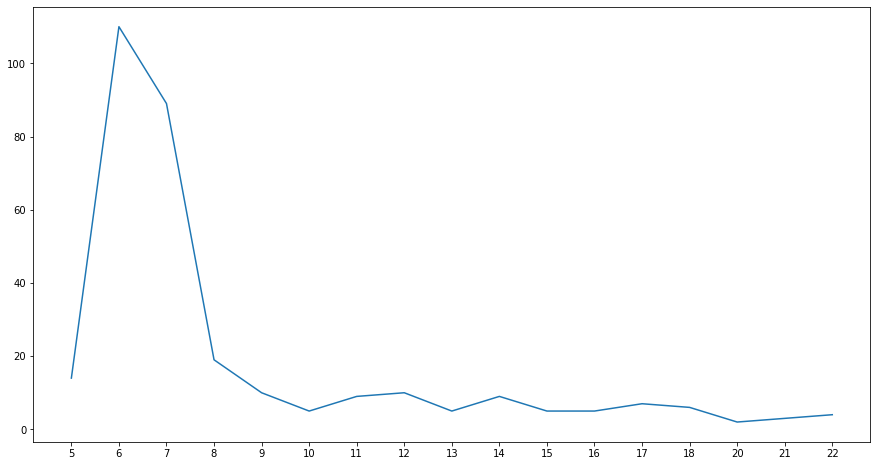

In [26]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [27]:
#整年貼文數量分佈
whole_year = hsu[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,22
1,2019-02,19
2,2019-03,24
3,2019-04,29
4,2019-05,23
5,2019-06,21
6,2019-07,28
7,2019-08,24
8,2019-09,26
9,2019-10,26


In [28]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,24.000000
std,5.244044
min,11.000000
25%,22.000000
50%,24.000000
75%,27.000000
max,32.000000


In [29]:
results = hsu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,2876964940699410,149795,0,0,0,0,0,11843,5364,193
2019-02,2484651539694945,148316,0,0,0,0,0,10870,5559,167
2019-03,3138507208035720,232968,0,0,0,0,0,20583,6138,247
2019-04,3792362876376495,357686,0,0,0,0,0,23424,7490,224
2019-05,3007736074367565,293122,0,0,0,0,0,17442,3424,156
2019-06,2746193807031255,466252,0,0,0,0,0,24865,5468,188
2019-07,3661591742708340,399268,0,0,0,0,0,29322,8675,270
2019-08,3138507208035720,445271,0,0,0,0,0,21459,7294,186
2019-09,3400049475372030,461957,0,0,0,0,0,23369,9518,244


In [30]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,2876964940699410,149795,0,0,0,0,0,11843,5364,193
1,2019-02,2484651539694945,148316,0,0,0,0,0,10870,5559,167
2,2019-03,3138507208035720,232968,0,0,0,0,0,20583,6138,247
3,2019-04,3792362876376495,357686,0,0,0,0,0,23424,7490,224
4,2019-05,3007736074367565,293122,0,0,0,0,0,17442,3424,156
5,2019-06,2746193807031255,466252,0,0,0,0,0,24865,5468,188
6,2019-07,3661591742708340,399268,0,0,0,0,0,29322,8675,270
7,2019-08,3138507208035720,445271,0,0,0,0,0,21459,7294,186
8,2019-09,3400049475372030,461957,0,0,0,0,0,23369,9518,244
9,2019-10,3400049475372030,410275,0,0,0,0,0,17111,5488,177


In [31]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

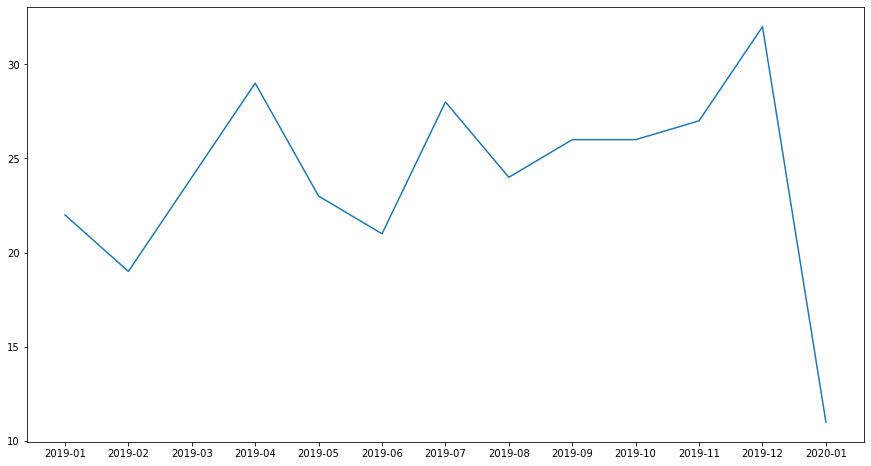

In [32]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [33]:
# 每個月的按讚、評論、分享總數 分佈
results = hsu.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,2876964940699410,149795,0,0,0,0,0,11843,5364,193
1,2019-02,2484651539694945,148316,0,0,0,0,0,10870,5559,167
2,2019-03,3138507208035720,232968,0,0,0,0,0,20583,6138,247
3,2019-04,3792362876376495,357686,0,0,0,0,0,23424,7490,224
4,2019-05,3007736074367565,293122,0,0,0,0,0,17442,3424,156
5,2019-06,2746193807031255,466252,0,0,0,0,0,24865,5468,188
6,2019-07,3661591742708340,399268,0,0,0,0,0,29322,8675,270
7,2019-08,3138507208035720,445271,0,0,0,0,0,21459,7294,186
8,2019-09,3400049475372030,461957,0,0,0,0,0,23369,9518,244
9,2019-10,3400049475372030,410275,0,0,0,0,0,17111,5488,177


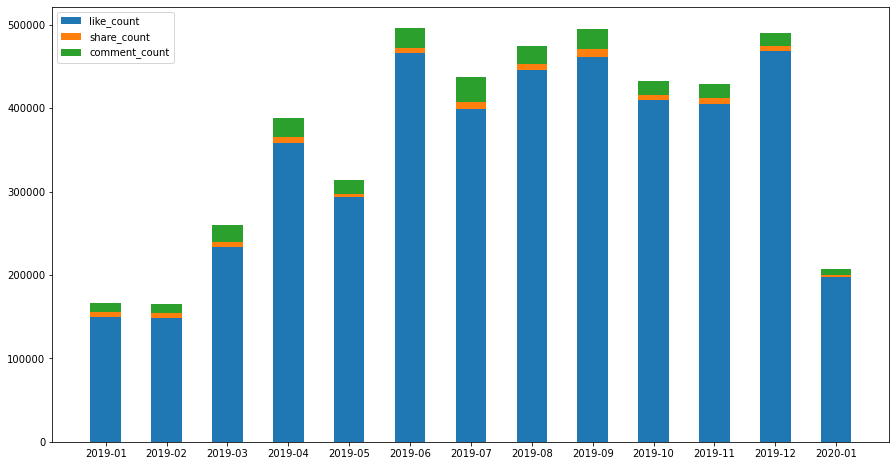

In [34]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [35]:
# 很明顯2月按讚、分享、評論數很低，因此找出2月的資料
lowest = hsu[hsu.month_year == "2019-02"]
results_low = lowest.groupby('new_date').sum()
results_low.index.name = 'newhead' #更改欄位名稱
results_low.reset_index(inplace=True)
results_low

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-02-01,130771133668155,7362,0,0,0,0,0,368,238,15
1,2019-02-02,130771133668155,4509,0,0,0,0,0,210,51,6
2,2019-02-03,130771133668155,5295,0,0,0,0,0,315,93,6
3,2019-02-04,130771133668155,15445,0,0,0,0,0,1539,1072,12
4,2019-02-06,130771133668155,17318,0,0,0,0,0,1582,335,6
5,2019-02-09,130771133668155,6546,0,0,0,0,0,379,173,7
6,2019-02-11,130771133668155,6191,0,0,0,0,0,383,215,7
7,2019-02-14,130771133668155,3056,0,0,0,0,0,211,58,10
8,2019-02-16,130771133668155,6367,0,0,0,0,0,394,129,8
9,2019-02-17,130771133668155,14416,0,0,0,0,0,924,1077,17


No handles with labels found to put in legend.


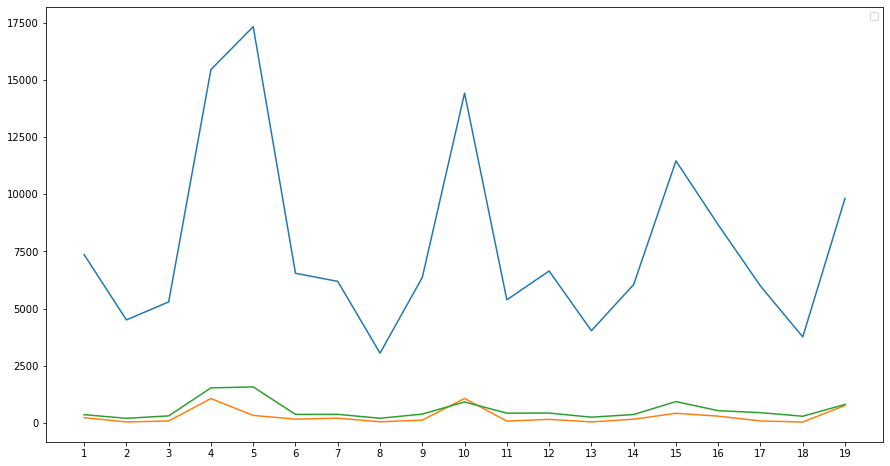

In [36]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,20)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_low['like_count'])
ax.plot(labels, results_low['share_count'])
ax.plot(labels, results_low['comment_count'])

ax.legend()

plt.show()

In [37]:
#02/14 號很明顯按讚最低  因此找出這天的文章
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Feb_14 = hsu[hsu['new_date'] == "2019-02-14"]
Feb_14[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-37-a25aee1092c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2544,竹山鎮中央里內枋寮野溪因豪大雨淘空兩岸邊坡，已危及鄰近農路和農田設施；為保護里民生命財產安全...,211,3056


In [38]:
#找出評論數量的統計值
hsu['comment_count'].describe()

count      312.000000
mean       770.150641
std        939.639090
min        160.000000
25%        318.750000
50%        446.500000
75%        912.750000
max      10478.000000
Name: comment_count, dtype: float64

In [39]:
#找出按讚數量的統計值

hsu['like_count'].describe()


count      312.000000
mean     14218.201923
std      10336.718186
min       2962.000000
25%       7816.500000
50%      10733.500000
75%      17120.500000
max      58965.000000
Name: like_count, dtype: float64

In [40]:
# 比較、查看他政見
promise = politics[politics.姓名 == "許 淑 華"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['48    一、制定利國、利民、利生態的綠色法令', '二、修改不合時宜法令，增列有助國家發展社會平權法令。...']

In [41]:
#按讚次數最少的貼文 
lastlike_10 = hsu.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
2530,冬季好茶出爐了~~ 全台種植茶葉面積佔7成的南投縣，每到茶季總是吸引國內外愛茶人士來收藏好茶...,2962,2019-01
2544,竹山鎮中央里內枋寮野溪因豪大雨淘空兩岸邊坡，已危及鄰近農路和農田設施；為保護里民生命財產安全...,3056,2019-02
2528,今日開心參加信義鄉投93隆華橋改建工程動土 106年6月致災性豪雨，大水沖壞南投縣信義鄉神...,3064,2019-01
2527,南投找茶專區～廣興茶城 南投好茶有口皆碑 ，不管是台灣各地的遊客 ，還是來自海外的觀光客都喜...,3123,2019-01
2536,參加信義鄉108年歲時祭儀及傳統技能競賽全鄉運動會 布農族祭儀活動非常多，有開墾祭、除草祭...,3258,2019-01
2800,台灣的農業何去何從、觀光一蹶不振、45萬的失業人口…這些都不是民進黨急著要立法幫助百姓解決的...,3524,2019-11
2585,請大家提醒農民好友注意喔~,3539,2019-03
2524,休會期間來到水里鄉郡坑村，先前為地方爭取1000萬元多條農路改善工程恰巧施工完畢，看到農民開...,3580,2019-01
2531,副總統陳建仁日前在「第3屆臺灣研究世界大會」上稱台灣是「亞洲人權燈塔」。 然根據勞動部統計顯...,3665,2019-01
2554,竹山鎮秀林里大湖底農路因路面不平整，嚴重影響該地農民進出，也增加農民運輸作物的不便，有鑑於此...,3765,2019-02


In [49]:
#許淑華的最少讚數前10的文章的 種類 video / photo?
lastlike_10 = hsu.sort_values(by = ['like_count'],ascending= True ).head(10)
lastlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
link,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
photo,9,9,9,9,9,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [50]:
# 很明顯6月按讚、分享、評論數開始上升，因此找出6月的資料
high = hsu[hsu.month_year == "2019-06"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-06-01,130771133668155,6101,0,0,0,0,0,234,50,6
1,2019-06-02,130771133668155,19353,0,0,0,0,0,1014,300,5
2,2019-06-03,130771133668155,8669,0,0,0,0,0,415,209,14
3,2019-06-04,130771133668155,25722,0,0,0,0,0,1695,726,6
4,2019-06-06,130771133668155,40539,0,0,0,0,0,1664,457,5
5,2019-06-08,130771133668155,10044,0,0,0,0,0,375,84,7
6,2019-06-10,130771133668155,30415,0,0,0,0,0,1608,344,5
7,2019-06-13,130771133668155,47793,0,0,0,0,0,2305,518,6
8,2019-06-15,130771133668155,45841,0,0,0,0,0,3642,537,18
9,2019-06-17,130771133668155,9463,0,0,0,0,0,345,62,7


No handles with labels found to put in legend.


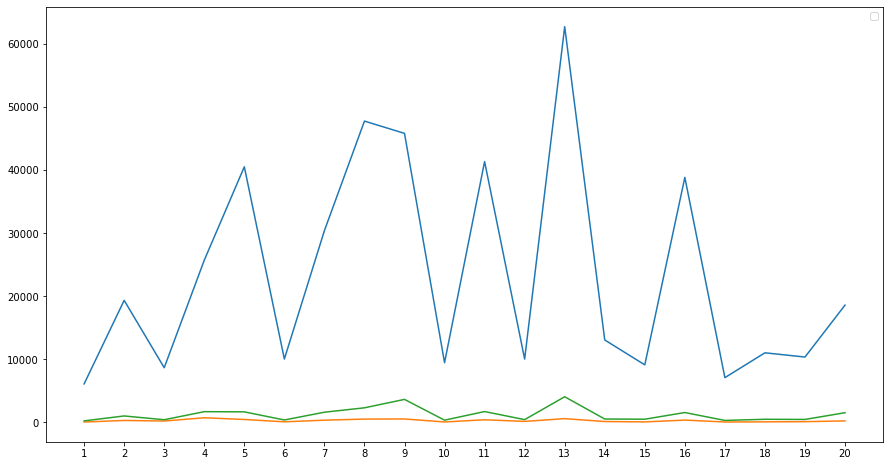

In [51]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,21)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [60]:
#06/22 號很明顯按讚最高  因此找出這天的文章
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Jun_22 = hsu[hsu['new_date'] == "2019-06-22"]
Jun_22[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-60-5f3049457994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2654,台中場圓滿成功 感謝大家熱情相挺~~,2513,36768
2655,還記得這個信號嗎？ 下午台中見~~,1547,26000


In [61]:
#欲找出韓國瑜造勢的幾篇天文按讚數及評論數
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Jun_01 = hsu[hsu['new_date'] == "2019-06-01"]
Jun_01[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)


<ipython-input-61-7e63275f4dfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2646,2016年之前，電動三輪車是不能上路的，當時淑華提出交管條例的修法，2016年11月1日三讀...,234,6101


In [62]:
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Jun_08 = hsu[hsu['new_date'] == "2019-06-08"]
Jun_08[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-62-31ef24af516b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2641,南投美食專區～宜珍飲食部 每次到信義鄉跑行程時，都會想到宜珍飲食部，雖然看似尋常的料理，吃起...,375,10044


In [63]:
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Jun_15 = hsu[hsu['new_date'] == "2019-06-15"]
Jun_15[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-63-298a0f834586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2659,雲林場12萬人圓滿成功，美中不足的是我又破音了，哈哈哈！ 6/22各位台中見~~,3642,45841


In [64]:
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Jun_22 = hsu[hsu['new_date'] == "2019-06-22"]
Jun_22[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-64-e32d46961dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2654,台中場圓滿成功 感謝大家熱情相挺~~,2513,36768
2655,還記得這個信號嗎？ 下午台中見~~,1547,26000


In [65]:
hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str
Jun_30 = hsu[hsu['new_date'] == "2019-06-30"]
Jun_30[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-65-74298edd9dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsu['new_date']=hsu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2674,感謝大家熱情參與，五場活動圓滿結束 7/6號用行動支持高雄，就是支持韓市長,1528,18599


In [53]:
#按讚次數最多的貼文 
mostlike_10 = hsu.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
2738,NaN,58965,2019-10
2692,謝謝親愛的老爸~ 父親節快樂,56154,2019-08
2713,熱情爆棚 感謝有你們~~,51721,2019-09
2802,大家早安~,50164,2019-11
2736,中秋節快樂~~,47874,2019-09
2703,南投龍鳳峽茶區~~,47831,2019-08
2639,大家早安~~,47793,2019-06
2659,雲林場12萬人圓滿成功，美中不足的是我又破音了，哈哈哈！ 6/22各位台中見~~,45841,2019-06
2804,聖誕快樂~~,45688,2019-12
2760,感謝大家的祝福~,43264,2019-10


In [54]:
#許淑華的最多讚數前10的文章的 種類 video / photo?
mostlike_10 = hsu.sort_values(by = ['like_count'],ascending=False).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,10,10,10,10,9,1,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [55]:
#許淑華的最多讚數前50的文章的 種類 video / photo?
mostlike_50 = hsu.sort_values(by = ['like_count'],ascending=False).head(50)
mostlike_50.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,48,48,48,48,46,2,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
video,2,2,2,2,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
